In [160]:
# Bagged Decision Trees for Classification
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import datasets, metrics
import matplotlib.pyplot as plt

df_beijing = pd.read_csv('data/chengdu.csv', delimiter= ",",header=0)
dataset = df_beijing.as_matrix()
#separate the data from the target attributes
def sep_data(dataset):
    dataset = dataset.as_matrix()
    X = dataset[:,1:14]
    y = dataset[:,15]
    return (X, y)


X, y = sep_data(df_beijing)
print(X.shape)

seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)
kfold = model_selection.KFold(n_splits=10, random_state=seed)

(21074, 13)


Test accuracy is 
 0.634983393959
             precision    recall  f1-score   support

        1.0       0.74      0.72      0.73      2424
        2.0       0.62      0.62      0.62      2283
        3.0       0.50      0.52      0.51       863
        4.0       0.45      0.44      0.44       448
        5.0       0.67      0.66      0.67       305

avg / total       0.64      0.63      0.64      6323

The cross validation score is 
 0.387549543448
[ 2.  2.  2. ...,  1.  1.  1.]


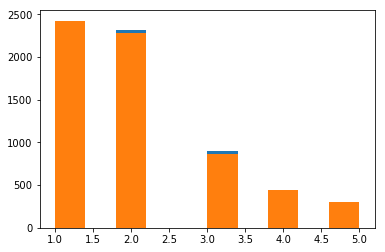

In [161]:
#decision tree
model_dt = DecisionTreeClassifier(min_samples_split=2, max_features='auto', random_state=seed)
trained_model_dt = model_dt.fit(X_train, y_train)
predictions_dt = trained_model_dt.predict(X_test)
results_dt = model_selection.cross_val_score(model_dt, X, y, cv=kfold)
print('Test accuracy is \n',accuracy_score(y_test, predictions_dt))
print(metrics.classification_report(y_test, predictions_dt))
print('The cross validation score is \n', results_dt.mean())
print(predictions_dt)
plt.figure()
plt.hist(predictions_dt)
plt.hist(y_test)
plt.show()

In [162]:
#bagging decision tree
num_trees = 100
model_bdt = BaggingClassifier(base_estimator=model_dt, n_estimators=num_trees, random_state=seed)
results_bdt = model_selection.cross_val_score(model_bdt, X, y, cv=kfold)
trained_model_bdt = model_bdt.fit(X_train, y_train)
predictions_bdt = trained_model_bdt.predict(X_test)
print('Test accuracy is \n',accuracy_score(y_test, predictions_bdt))
print(metrics.classification_report(y_test, predictions_bdt))
print('The cross validation score is \n', results_bdt.mean())

Test accuracy is 
 0.774790447572
             precision    recall  f1-score   support

        1.0       0.82      0.86      0.84      2424
        2.0       0.75      0.78      0.77      2283
        3.0       0.69      0.61      0.65       863
        4.0       0.71      0.60      0.65       448
        5.0       0.84      0.77      0.80       305

avg / total       0.77      0.77      0.77      6323

The cross validation score is 
 0.471921349185


In [163]:
#Random forest Classification
model_rf = RandomForestClassifier(n_estimators = num_trees, max_features= 3, random_state=seed)
trained_model_rf = model.fit(X_train, y_train)
predictions_rf = trained_model_rf.predict(X_test)

results_rf = model_selection.cross_val_score(model_rf, X, y, cv=kfold)
print('Test accuracy is \n',accuracy_score(y_test, predictions_rf))
print(metrics.classification_report(y_test, predictions_rf))
print('The cross validation score is \n', results_rf.mean())

Test accuracy is 
 0.776688280879
             precision    recall  f1-score   support

        1.0       0.82      0.86      0.84      2424
        2.0       0.75      0.78      0.77      2283
        3.0       0.71      0.62      0.66       863
        4.0       0.71      0.60      0.65       448
        5.0       0.85      0.79      0.82       305

avg / total       0.77      0.78      0.77      6323

The cross validation score is 
 0.470118715153


In [164]:
# Extra Trees Classification
model_et = ExtraTreesClassifier(n_estimators=num_trees, max_features=12, random_state=seed)
results_et = model_selection.cross_val_score(model_et, X, y, cv=kfold)
trained_model_et = model.fit(X_train, y_train)
predictions_et = trained_model_et.predict(X_test)
print('Test accuracy is \n',accuracy_score(y_test, predictions_et))
print(metrics.classification_report(y_test, predictions_et))
print('The cross validation score is \n', results_et.mean())

Test accuracy is 
 0.776688280879
             precision    recall  f1-score   support

        1.0       0.82      0.86      0.84      2424
        2.0       0.75      0.78      0.77      2283
        3.0       0.71      0.62      0.66       863
        4.0       0.71      0.60      0.65       448
        5.0       0.85      0.79      0.82       305

avg / total       0.77      0.78      0.77      6323

The cross validation score is 
 0.43974800723


In [165]:
df = pd.read_csv('DT/stackTest1.csv')
df.columns.values

array(['stack_pred'], dtype=object)

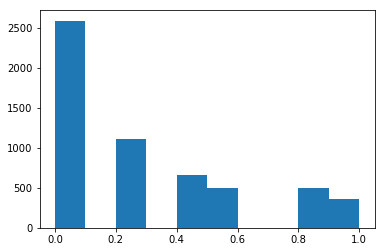

In [166]:
plt.hist(df['stack_pred'])
plt.show()

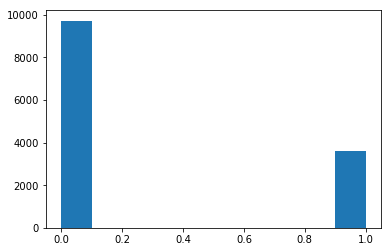

In [167]:
df_train = pd.read_csv('DT/stackTrain1.csv')
plt.hist(df_train['stack_pred'])
plt.show()